# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(12, 8)

sns.set()

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

This dataset consists of the official statistics on the 11,538 athletes and 306 events at the 2016 Olympic Games in Rio de Janeiro. The athletes file includes the name, nationality (as a three letter IOC country code), gender, age (as date of birth), height in meters, weight in kilograms, sport, and quantity of gold, silver, and/or bronze medals won for every Olympic athlete at Rio. The events file lists the name, sport, discipline (if available), gender of competitors, and venue(s) for every Olympic event at Rio 2016.

In [6]:
df = athletes.copy()

In [11]:
# Sua análise começa aqui.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [8]:
pd.DataFrame({'cols':df.columns,
             'nunique':df.nunique(),
             'nan':df.isnull().sum(),
             'nan%':(df.isnull().sum()*100)/len(df)})

,cols,nunique,nan,nan%
id,id,11538,0,0.000000
name,name,11517,0,0.000000
nationality,nationality,207,0,0.000000
sex,sex,2,0,0.000000
dob,dob,5595,1,0.008667
height,height,82,330,2.860114
weight,weight,123,659,5.711562
sport,sport,28,0,0.000000
gold,gold,6,0,0.000000
silver,silver,3,0,0.000000


In [9]:
# The person who won more gold medals
df[df.gold == df.gold.max()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
7401,491565031,Michael Phelps,USA,male,6/30/85,1.94,90.0,aquatics,5,1,0


In [10]:
# The person who won more medals
df['total'] = df[['gold','silver','bronze']].sum( axis=1)
df[df['total']==df['total'].max()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,total
7401,491565031,Michael Phelps,USA,male,6/30/85,1.94,90.0,aquatics,5,1,0,6


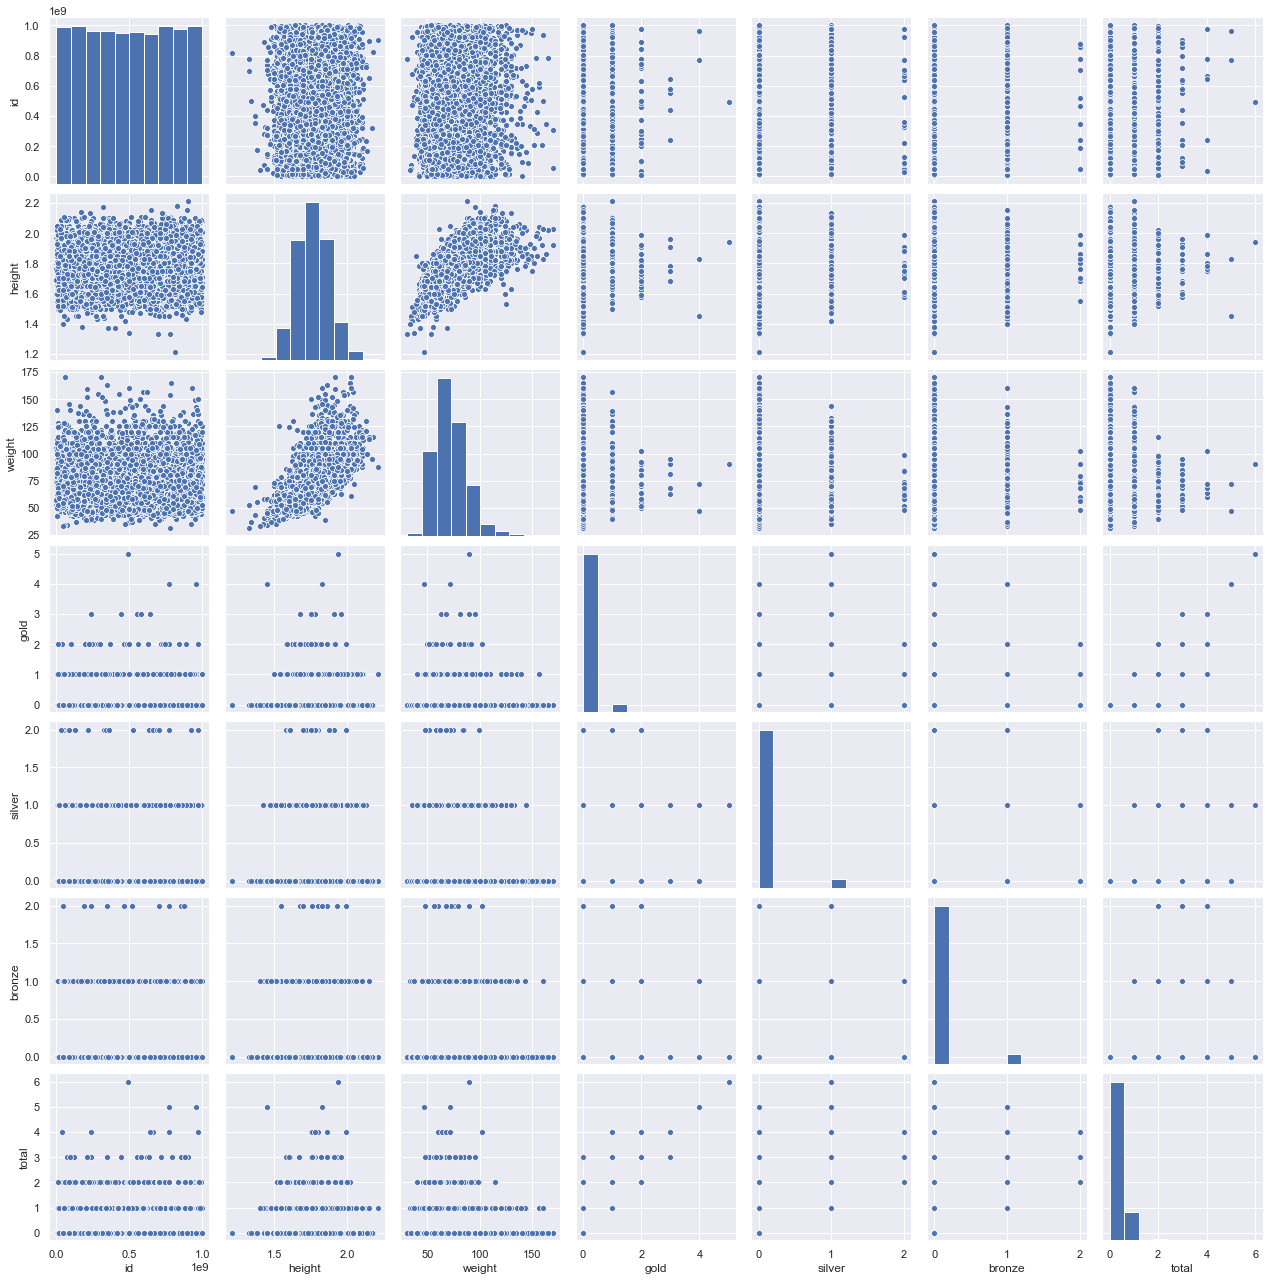

In [10]:
sns.pairplot(df)

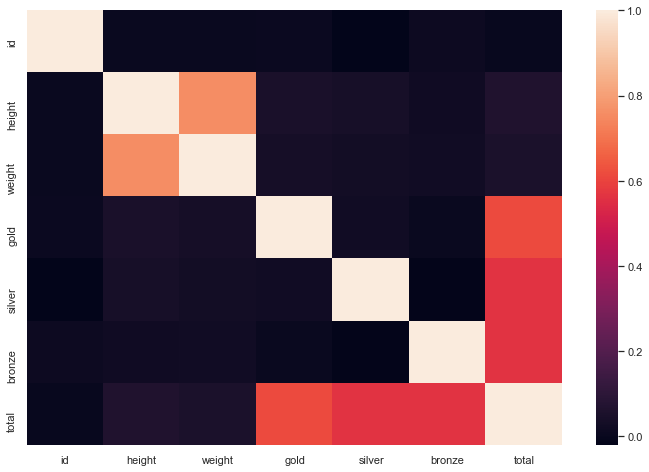

In [11]:
sns.heatmap(df.corr())

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

**scipy.stats.shapiro**\
Shapiro-Wilk test for normality.\
The Shapiro-Wilk test tests the _null hypothesis_ that the data was drawn from a normal distribution.\
For N > 5000 the W test statistic is accurate but the p-value may not be.\
The chance of rejecting the _null hypothesis_ when it is true is close to 5% regardless of sample size.

In [7]:
def q1():
    '''
    Normality test scipy.stats.shapiro(x)
    Null hypothesis states: data was drawn from a normal distribution.
    if p_val<significance level, we reject the null hypothesis
    if p_val>significance level, we can't Reject the null, it means normal_dist_eval = True
    '''
    alpha = 0.05
    sample = get_sample(df, 'height', 3000).ravel() #get sample
    p_val = sct.shapiro(sample)[1] #test
    normal_dist_eval = p_val>alpha
    
    return normal_dist_eval   

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [8]:
q1() # p_val<0.05, we reject the Null Hypothesis (the data does not follow normal distribution)

False

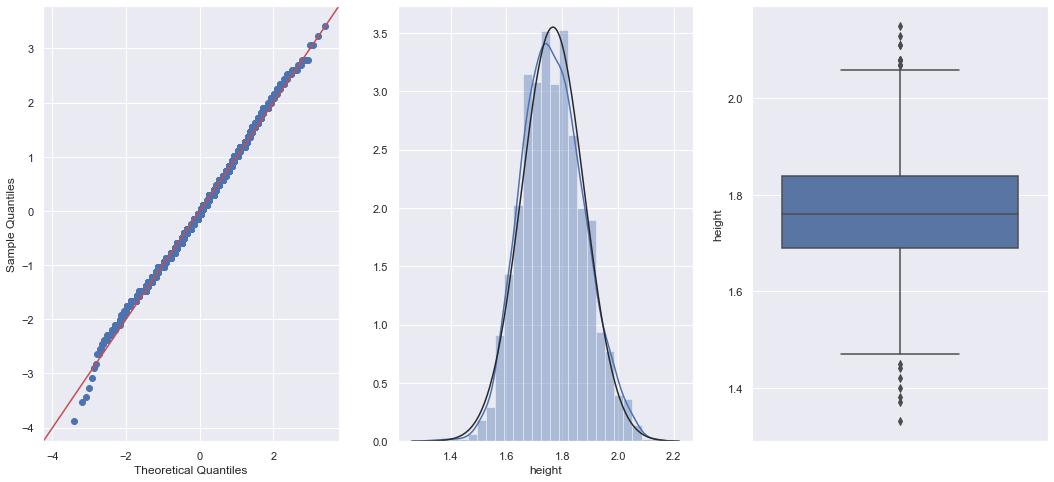

In [31]:
sample_h = get_sample(df, 'height', 3000)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
sm.qqplot(sample_h, fit=True, line ='45', ax = ax1) 
sns.distplot(sample_h, fit=sct.norm, bins=25, kde=True, ax=ax2)
sns.boxplot(y = sample_h, ax=ax3)
plt.show()

As we can see above on QQ-plot, the sample quantiles/percentiles fit very well the theorical quantiles.
The same is seen in the histogram plot, where the normal fitted line is very close to the KernelDensityFunction.

Remember: Quantiles/percentiles are points in your data below which a certain proportion of your data fall.

In [34]:
sample_h.skew()#, sct.mode(sample_h)[0][0], np.median(sample_h)

0.15982888594665348

In [39]:
print("Mode {1:f} | Mean {0:f} | Median {2:f} ".format(sample_h.mean(), sample_h.mode()[0], sample_h.median()))
print("Skew {0:f} | Kurtosis {1:f} | Std {2:f} ".format(sample_h.skew(), sample_h.kurt(), sample_h.std()))

Mode 1.800000 | Mean 1.766780 | Median 1.760000 
Skew 0.159829 | Kurtosis -0.044875 | Std 0.112402 


It has skew $\approx 0$ showing symmetry and the kustosis  $\approx 0$ also shows that the variable approximates the normal distribution.

The shape of the distribution and the result of Shapiro test don't seem to match. Height is a fisic variable and it **SHOULD** follow normal distribution

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

**scipy.stats.jarque_bera(x)**

Perform the Jarque-Bera goodness of fit test on sample data.
The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.

In [48]:
def q2():  
    '''
    Normality test scipy.stats.jarque_bera(x)
    Null hypothesis states: data was drawn from a normal distribution.
    if p_val<significance level, we reject the null hypothesis
    if p_val>significance level, we can't Reject the null, it means normal_dist_eval = True
    '''    
    alpha = 0.05
    sample = get_sample(df, 'height', 3000).ravel()
    p_val = sct.jarque_bera(sample)[1].item()
    normal_dist_eval = p_val>alpha
    
    return normal_dist_eval

__Para refletir__:

* Esse resultado faz sentido?

In [49]:
q2()

False

The Jarque-Bera  test still tells us height is not a normal distribution. 

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

**scipy.stats.normaltest(a, axis=0, nan_policy='propagate')**

Test whether a sample differs from a normal distribution.
This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.

In [47]:
def q3():
    '''
    Normality test scipy.stats.normaltest(a, axis=0, nan_policy='propagate')
    Null hypothesis states: data was drawn from a normal distribution.
    if p_val<significance level, we reject the null hypothesis
    if p_val>significance level, we can't reject the null, it means normal_dist_eval = True
    '''    
    alpha = 0.05
    sample = get_sample(df, 'weight', 3000).ravel()
    p_val = sct.normaltest(sample)[1].item()
    normal_dist_eval = p_val>alpha

    return normal_dist_eval

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

In [20]:
q3()

False

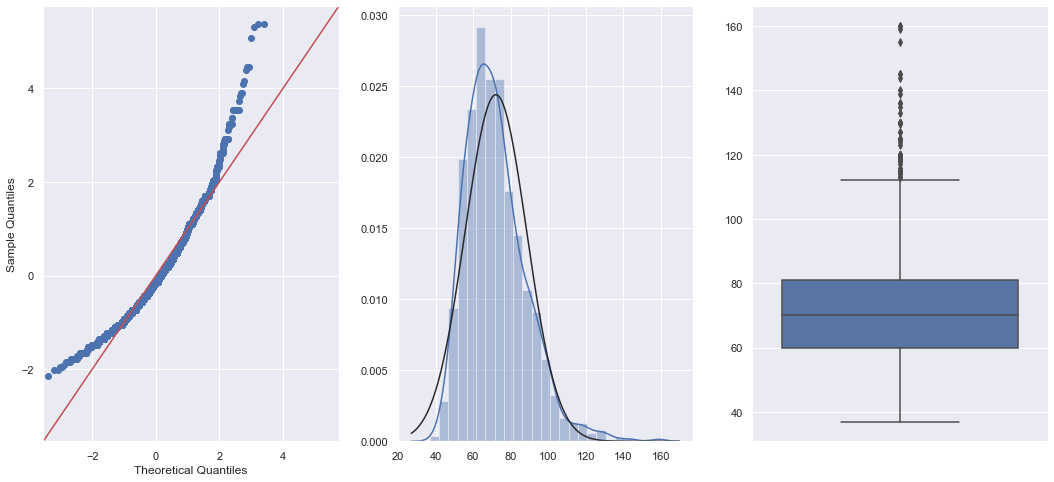

In [81]:
sample_w = get_sample(df, 'weight', 3000).ravel()
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
sm.qqplot(sample_w, fit=True, line ='45', ax = ax1) 
sns.distplot(sample_w, fit=sct.norm, bins=25, kde=True, ax=ax2 )
sns.boxplot(y = sample_w, ax=ax3)
plt.show()

Yes! The shape of graph, the qq-plot and the outliers in the box-plot do not corroborate with the _status quo_. 

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [46]:
def q4():
    '''
    Normality test scipy.stats.normaltest(a, axis=0, nan_policy='propagate')
    Null hypothesis states: data was drawn from a normal distribution.
    if p_val<significance level, we reject the null hypothesis
    if p_val>significance level, we can't reject the null, it means normal_dist_eval = True
    '''    
    alpha = 0.05
    sample = np.log(get_sample(df, 'weight', 3000).ravel())
    p_val = sct.normaltest(sample)[1].item()
    normal_dist_eval = p_val>alpha
    
    return normal_dist_eval

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

In [26]:
q4()

False

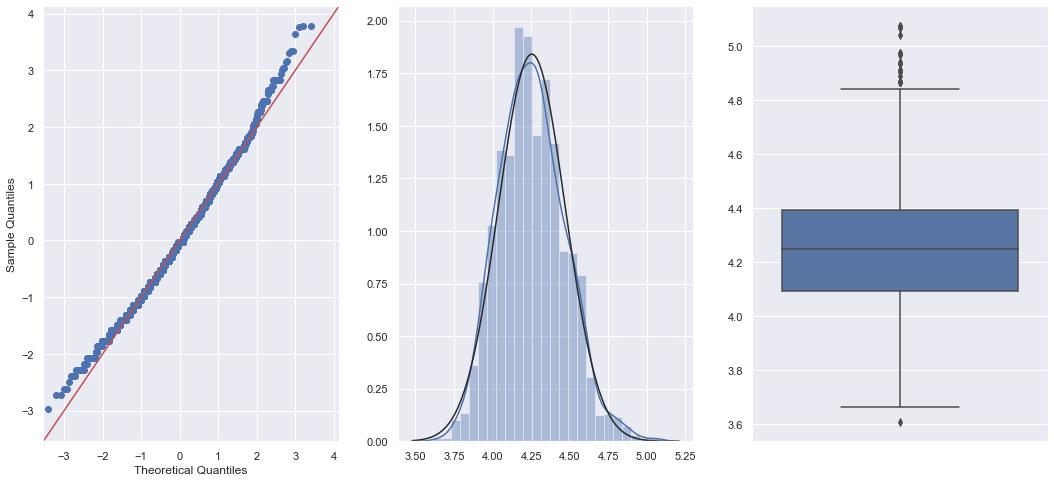

In [87]:
sample_w_log = np.log(get_sample(df, 'weight', 3000).ravel())
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
sm.qqplot(sample_w_log, fit=True, line ='45', ax = ax1) 
sns.distplot(sample_w_log, fit=sct.norm, bins=25, kde=True, ax=ax2 )
sns.boxplot(y = sample_w_log, ax=ax3)
plt.show()

The boxplot shows less outliers, as well as the qq-plot fits better the staight line, however the quantiles probabilities are still higher than the theorical quantiles.

The shape of the graph $\approx$ a normal distribution, however the test says the opposite .

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [89]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,total
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,0


In [169]:
bra = df.loc[df.nationality == "BRA", 'height'].dropna()
usa = df.loc[df.nationality == "USA", 'height'].dropna()
can = df.loc[df.nationality == "CAN", 'height'].dropna()
print("Variance BRA {:f} USA {:f} CAN {:f}".format(bra.var(), usa.var(), can.var()))
print("Mean     BRA {:f} USA {:f} CAN {:f}".format(bra.mean(), usa.mean(), can.mean()))

Variance BRA 0.013780 USA 0.014152 CAN 0.013932
Mean     BRA 1.764034 USA 1.787768 CAN 1.758594


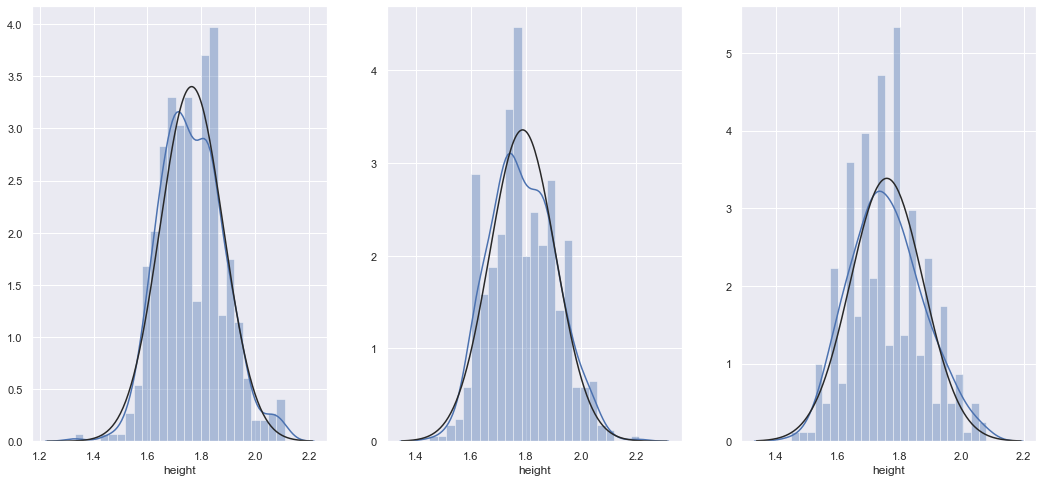

In [171]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
sns.distplot(bra, fit=sct.norm, bins=25, kde=True, ax=ax1)
sns.distplot(usa, fit=sct.norm, bins=25, kde=True, ax=ax2)
sns.distplot(can, fit=sct.norm, bins=25, kde=True, ax=ax3)
plt.show()

**scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')**

Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [36]:
def q5():
    '''
    Run scipy.stats.ttest_ind(a,b, equal_var)
    Evaluate if there are statistically significant differences 
    between the mean of the sample means from 2 independent groups 
    and different variance 
    Status quo: There is no statistical significant difference (equal averages)
    '''
    alpha=0.05
    bra = df.loc[df.nationality == "BRA", 'height'].dropna()
    usa = df.loc[df.nationality == "USA", 'height'].dropna()

    p_val = sct.ttest_ind(bra,usa,equal_var=False)[1].item()
    stats_equal = p_val>alpha
    return stats_equal

In [37]:
q5()

False

We reject the null hypothesis p-value $\approx$ 0.001! The average height of Brazilians and Americans athletes is statistically different. 

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [43]:
def q6():
    '''
    Run scipy.stats.ttest_ind(a,b, equal_var)
    Evaluate if there are statistically significant differences 
    between the mean of the sample means from 2 independent groups 
    and different variance 
    Status quo: There is no statistical significant difference (equal averages)
    '''
    alpha=0.05
    bra = df.loc[df.nationality == "BRA", 'height'].dropna()
    usa = df.loc[df.nationality == "USA", 'height'].dropna()
    can = df.loc[df.nationality == "CAN", 'height'].dropna()
    p_val = sct.ttest_ind(bra,can,equal_var=False)[1].item()
    stats_equal = p_val>alpha
    return stats_equal

In [44]:
q6()

True

We CAN'T reject the null hypothesis p-value $\approx$ 0.523! The average height of Brazilians and Canadian athletes is statistically the same. 

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [163]:
def q7():
    '''
    Run scipy.stats.ttest_ind(a,b, equal_var)
    Evaluate if there are statistically significant differences 
    between the mean of the sample means from 2 independent groups 
    and different variance 
    Status quo: There is no statistical significant difference (equal averages)
    '''
    alpha=0.05
    usa = df.loc[df.nationality == "USA", 'height'].dropna()
    can = df.loc[df.nationality == "CAN", 'height'].dropna()
    p_val = sct.ttest_ind(usa,can,equal_var=False)[1].item()
    return round(p_val,8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [164]:
q7()

0.00046601

We reject the null hypothesis p-value $\approx 0.0005$ ! The average height of American and Canadian athletes is statistically different. 

The p-value  is the smallest level of significance at which we can still reject the _Null hypoyhesys_ . 

Let's say that there is $0.05\%$ chance of making a Type 1 error, reject the null hypothesis ( _status quo_ : the average height is the same) while it is true.